In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Part A: Neural Network Class Implementation

In this section, we define the `FeedforwardNeuralNetwork` class, which implements the core functionality of the neural network. The class has the following key methods:
1. **`__init__`**: Initializes the weights and biases of the network.
2. **`forward_pass`**: Computes the output of the network by passing the input through the layers using activation functions.
3. **`backward_pass`**: Updates the weights and biases using backpropagation and gradient descent.
4. **`train`**: Trains the network by performing forward and backward passes for multiple epochs.
5. **`plot_loss`**: Plots the loss curve to visualize the training process.


In [2]:

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Define the feedforward neural network class
class FeedforwardNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.01
        self.bias_output = np.zeros((1, output_size))

    def forward_pass(self, X):
        # Compute the hidden layer activations
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)

        # Compute the output layer activations
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = sigmoid(self.output_layer_input)
        return self.output_layer_output

    def backward_pass(self, X, y, output):
        # Calculate the error
        error = y - output

        # Output layer gradients
        output_gradient = error * sigmoid_derivative(output)
        hidden_output_gradient = np.dot(output_gradient, self.weights_hidden_output.T) * sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_layer_output.T, output_gradient) * self.learning_rate
        self.bias_output += np.sum(output_gradient, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_output_gradient) * self.learning_rate
        self.bias_hidden += np.sum(hidden_output_gradient, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs, learning_rate):
        self.learning_rate = learning_rate
        self.losses = []
        for epoch in range(epochs):
            # Perform forward pass
            output = self.forward_pass(X)

            # Perform backward pass
            self.backward_pass(X, y, output)

            # Compute loss (mean squared error)
            loss = np.mean((y - output) ** 2)
            self.losses.append(loss)
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.6f}")

    def plot_loss(self):
        plt.figure(figsize=(8, 6))
        plt.plot(self.losses, label='Training Loss', color='blue')
        plt.title("Loss Curve")
        plt.xlabel("Epochs")
        plt.ylabel("Mean Squared Error (MSE)")
        plt.legend()
        plt.grid(True)
        plt.show()



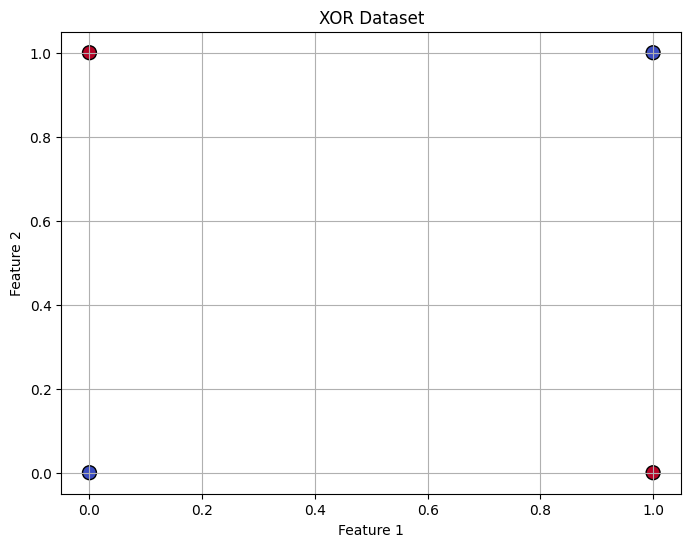

In [4]:
# Dataset: XOR problem (as an example)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='coolwarm', s=100, edgecolors='k')
plt.title("XOR Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


# Part B: Training the Neural Network

In this part, we define the training process. We initialize the neural network and train it on the XOR dataset. The training process involves:
1. Performing forward passes to compute predictions.
2. Performing backward passes to update weights and biases based on the error.
3. Monitoring the loss during training to observe how well the model is learning.


# Part C: Visualizations

Here, we plot:
1. The training loss curve to observe how the loss decreases over time.
2. The decision boundary to visualize how well the neural network has learned to separate the classes.


Epoch 100/1000, Loss: 0.250000
Epoch 200/1000, Loss: 0.250000
Epoch 300/1000, Loss: 0.250000
Epoch 400/1000, Loss: 0.250000
Epoch 500/1000, Loss: 0.250000
Epoch 600/1000, Loss: 0.250000
Epoch 700/1000, Loss: 0.250000
Epoch 800/1000, Loss: 0.250000
Epoch 900/1000, Loss: 0.250000
Epoch 1000/1000, Loss: 0.250000


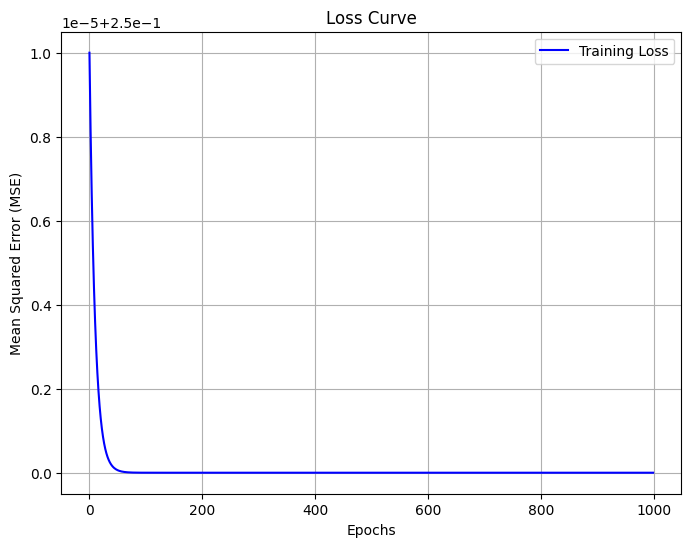


Testing Neural Network:
Input: [0 0], Predicted Output: 0.500008, True Output: 0
Input: [0 1], Predicted Output: 0.500001, True Output: 1
Input: [1 0], Predicted Output: 0.499999, True Output: 1
Input: [1 1], Predicted Output: 0.499992, True Output: 0


In [7]:
# Define neural network parameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.1

# Create and train the neural network
nn = FeedforwardNeuralNetwork(input_size, hidden_size, output_size)
nn.train(X, y, epochs=1000, learning_rate=learning_rate)

# Plot training loss
nn.plot_loss()

# Test the network
print("\nTesting Neural Network:")
for i in range(len(X)):
    predicted_output = nn.forward_pass(X[i].reshape(1, -1))
    print(f"Input: {X[i]}, Predicted Output: {predicted_output[0][0]:.6f}, True Output: {y[i][0]}")


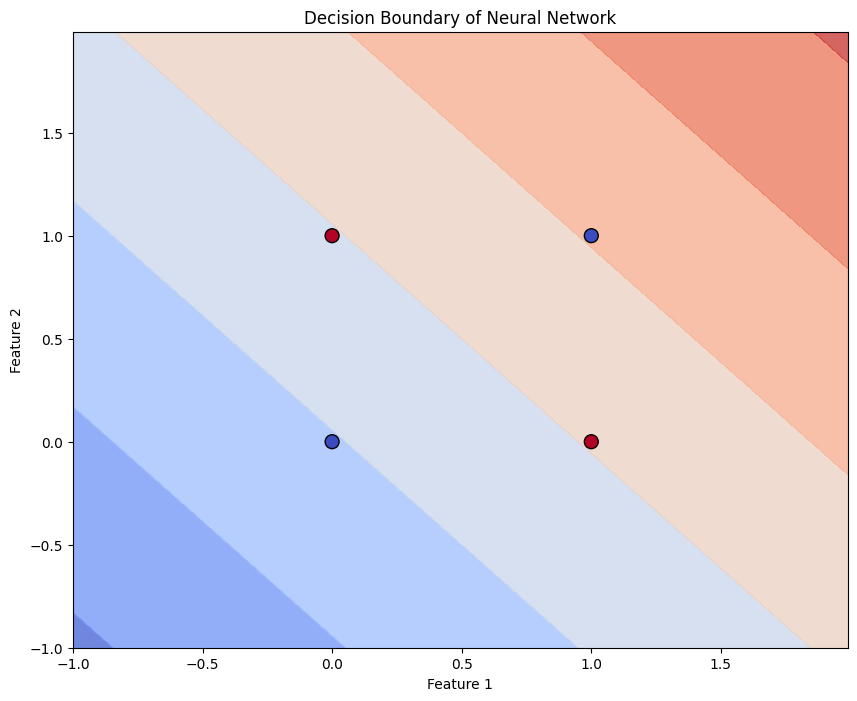

In [6]:
# Visualizations of decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = nn.forward_pass(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', s=100, cmap='coolwarm')
plt.title("Decision Boundary of Neural Network")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
